# Parameter Tuning Tutorial    

<div class="alert alert-block alert-info">
<b> Objective:</b> 
This tutorial covers how to perform hyperparameter tuning on a random forest model using sklearn's GridSearchCV and RandomSearchCV. 
</div>

 **Brief Overview of Random Forests from** [TowardDataScience](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76): Click on hyperlink to learn more.
> A random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:
1. Random sampling of training data points when building trees
2. Random subsets of features considered when splitting nodes

**The Dataset**
The random forest model will be trained to recognize handwritten digits from the MNIST database. Each greyscale image is 28 x 28, representing the digits 0-9, and consists of 60,000 training images and 10,000 test images. To reduce computational time, this tutorial uses only a subset of the full dataset (10,000 train images and 1,000 test images). Assuming a Gaussian distribution for the MNIST dataset, the dataset is also standardized such that each feature has a mean of 0 and a standard deviation of 1.

<div class="alert alert-block alert-warning">

# Hyperparameter Tuning Methods

<div>
    

The base random forest model which will be tuned is initialized with 500 estimators and a random state of 42. Using five-fold cross validation, this base model has an mean accuracy score of 0.89 with a standard deviation of 0.02.     

```Python
from sklearn.model_selection import GridSearchCV
# Set up classifier and train classifer
clf = RandomForestClassifier(n_estimators=500, random_state = 42)
```

1. GridSearchCV

This function allows you to run an exhaustive search on all of the possible parameters and parameter combinations as inputs to the Random Forest model and returns the parameters that gives the best performance. 

> Below is the grid of all possible parameter combinations that are supplied to the Random Forest model. Only two parmeters, max_features and the max_depth of the random forest model, is tweaked. There are 100 possible combinations of these combinations.

```Python
from sklearn.model_selection import GridSearchCV
# Set up combinations of paramters to tune
param_grid = { 
    'max_features': np.logspace(2.0, 10, num = 10, base=2.0, endpoint = False, dtype = int),
    'max_depth' : np.logspace(2.0, 8.0, num = 10, base=2.0, endpoint = False, dtype = int),
}
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 3)
```

2. RandomizedSearchCV

Instead of trying out an exhaustive list of parameters and parameter combinations like GridSearchCV, only a fixed number of parameter combinations is sampled from the full sample space containing all possible combinations of parameter settings. The number of parameter settings that are tried is given by n_iter. 

> Below is the grid of all possible parameter combinations that are supplied to the Random Forest model. Only two parmeters, max_features and the max_depth of the random forest model, is tweaked. There are 100 possible combinations of these combinations. Of the 100 possible combinations, this sample code below in the tutorial selects 50.

```Python
from sklearn.model_selection import RandomizedSearchCV
# Set up combinations of paramters to tune
param_grid = { 
    'max_features': np.logspace(2.0, 10, num = 10, base=2.0, endpoint = False, dtype = int),
    'max_depth' : np.logspace(2.0, 8.0, num = 10, base=2.0, endpoint = False, dtype = int),
}
CV_clf = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter = 50,
                            cv = 3, random_state=42)
```

<div class="alert alert-block alert-success">
    
# Results 
    
</div>

|Models         |Performance   |                    Best Params  |        Computation Time    |
|---------------|--------------|---------------------------------|----------------------------|
|Base Model     | 0.89 ± 0.02  |                                 |                            |  
|Grid Search    | 0.89 ± 0.01  | n_features = 21, max_depth = 21 |CPU total time: 3h 55min 39s|
|Random Search  | 0.90 ± 0.02  | n_features = 21, max_depth = 111|CPU total time: 2h 6min 6s  | 


<img src="varying_features_plot.png" width="45%" align="left">
<img src="varying_depths_plot.png" width="45%" align="right">

<div class="alert alert-block alert-info">  
    
# Code
    
</div>

<div class="alert alert-block alert-warning">
Code is structured in the following order.
    <ol>
    <li> Loading and Preprocessing Data </li>
    <li> Building Base Random Forest Model </li>
    <li> Tuning the number of features </li>
    <li> Tuning the depths of the trees </li>
    <li> Grid Search Tuning </li>
    <li> Random Search Tuning </li>
    </ol>
</div>

In [2]:
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<div class="alert alert-block alert-warning">
    <center>Section One: Loading and Preprocessing Data</center>
</div>
<div class="alert alert-block alert-info">
  There are 70,000 images of handwritten digits in this dataset. Each 28x28 pixel image has been transformed into a 1D vector with 784 features.
</div>


In [3]:
# Load the dataset
images, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

# Check dimensions of the data
images.shape

(70000, 784)

<div class="alert alert-block alert-info">
    Visualize the data. Use PIL to reshape and create a new image object and matplotlib to visualize the numpy array.
</div>


label: 9


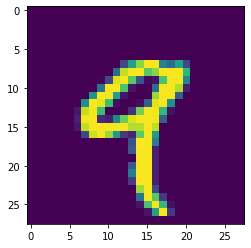

In [30]:
# Pick the fifth image from the dataset (it's a 9)
i = 4
image, label = images[i], labels[i]

# Print the image
output = Image.new("L", (28, 28))
output.putdata(image)
print('label:',label)
plt.imshow(np.asarray(output))

<div class="alert alert-block alert-info">
    Split the data into training and testing samples. To reduce computational time, use only 10,000 samples for training and 1000 for testing.
</div>

In [4]:
# Splitting the data into training and testing samples
from sklearn.model_selection import train_test_split
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, train_size = 10000,
                                                                        test_size = 1000, random_state = 42)
print('Train samples:', images_train.shape[0])
print('Test samples:', images_test.shape[0])

Train samples: 10000
Test samples: 1000


<div class="alert alert-block alert-info">
    Assume a Gaussian distribution for the MNIST dataset and standardize the data such that each feature has a mean of 0 and a standard deviation of 1.
</div>

In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
images_train = scaler.fit_transform(images_train)
images_test = scaler.transform(images_test)

<div class="alert alert-block alert-warning">
    <center>Section Two: Create and evaluate base Random Forest model with 500 estimators.</center>
</div>

<div class="alert alert-block alert-info">
    Set up a random forest classifier with 500 trees, leaving other parameters as default parameters.
</div>

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Set up classifier and train classifer
clf = RandomForestClassifier(n_estimators=500, random_state = 42)
print(clf)
clf.fit(images_train, labels_train)

# Test classifier
predicted_labels = clf.predict(images_test)

# Evaluate classifier
print("Accuracy: ", accuracy_score(labels_test, predicted_labels))

# Using cross validation to evaluate performance. Compute mean score and 95% interval of score estimate
scores = cross_val_score(clf, images_test, labels_test, cv=5, scoring='accuracy')
print(scores)
print("Cross-Validation (CV=5) Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Accuracy:  0.954
[0.91133005 0.89108911 0.90049751 0.89393939 0.88265306]
Cross-Validation (CV=5) Accuracy: 0.90 (+/- 0.02)


<div class="alert alert-block alert-warning">
    <center>Section Three: Tuning number of features. </center>
</div>

In [25]:
%%time
# Variable to store the accuracies of each random forest classifier with varying number of features
accuracies = []
# Number of features to perform a hyperparameter sweep
features = np.logspace(2.0, 10.0, num=20, base=2.0, endpoint = False, dtype = int)

# Number of experiments to run for each feature value
num_trials = 10

feature_dataObj = pd.DataFrame()
feature_list = []
accuracy_scores = []

for feature in features:
    print(feature)
    
    for t in range(num_trials):
        clf = RandomForestClassifier(n_estimators=500, max_features = feature, max_depth = 5)
        clf.fit(images_train, labels_train)

        # Test classifier
        predicted_labels = clf.predict(images_test)

        # Evaluate classifier
        score = accuracy_score(labels_test, predicted_labels)
        accuracy_scores.append(score)
        feature_list.append(feature)
        
feature_dataObj['Feature List'] = feature_list
feature_dataObj['Accuracy'] = accuracy_scores      

4
5
6
9
12
16
21
27
36
48
64
84
111
147
194
256
337
445
588
776
CPU times: user 2h 10min 47s, sys: 16.3 s, total: 2h 11min 3s
Wall time: 2h 18min 44s


     Feature List  Accuracy
0               4     0.845
1               4     0.845
2               4     0.845
3               4     0.837
4               4     0.846
..            ...       ...
195           776     0.786
196           776     0.791
197           776     0.794
198           776     0.798
199           776     0.795

[200 rows x 2 columns]


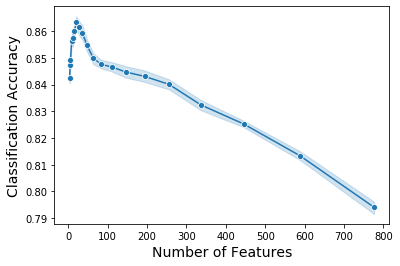

In [36]:
import seaborn as sns
sns.lineplot(x='Feature List', y='Accuracy',data=feature_dataObj, marker='o')
# plt.title('Varying Max_Features for MNIST Data')
plt.xlabel('Number of Features',fontsize=14)
plt.ylabel('Classification Accuracy',fontsize=14)
print(feature_dataObj)
# save the figure to the current working directory
plt.savefig('varying_features_plot.png', dpi=300, bbox_inches='tight')

<div class="alert alert-block alert-warning">
    <center> Section Four: Tuning maximum depth of trees. </center> 
</div>

In [27]:
%%time
# Variable to store the accuracies of each random forest classifier with varying number of features
accuracies = []
# Number of depths to perform a hyperparameter sweep
depths = np.logspace(2.0, 8.0, num = 10, base=2.0, endpoint = False, dtype = int)

# Number of experiments to run for each depth value
num_trials = 10

depth_dataObj = pd.DataFrame()
depth_list = []
accuracy_scores = []

for depth in depths:
    print(depth)
    
    for t in range(num_trials):
        clf = RandomForestClassifier(n_estimators=500, max_depth = depth)
        clf.fit(images_train, labels_train)

        # Test classifier
        predicted_labels = clf.predict(images_test)

        # Evaluate classifier
        score = accuracy_score(labels_test, predicted_labels)
        accuracy_scores.append(score)
        depth_list.append(depth)
        
depth_dataObj['Depth List'] = depth_list
depth_dataObj['Accuracy'] = accuracy_scores 

4
6
9
13
21
32
48
73
111
168
CPU times: user 25min 47s, sys: 10 s, total: 25min 57s
Wall time: 28min 4s


    Depth List  Accuracy
0            4     0.824
1            4     0.806
2            4     0.810
3            4     0.812
4            4     0.816
..         ...       ...
95         168     0.956
96         168     0.958
97         168     0.957
98         168     0.955
99         168     0.958

[100 rows x 2 columns]


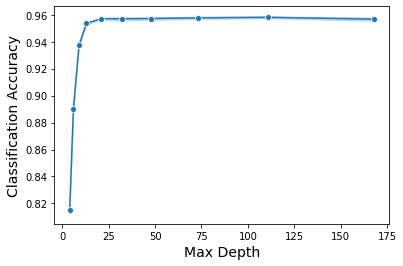

In [37]:
sns.lineplot(x='Depth List', y='Accuracy',data = depth_dataObj,marker='o')
plt.xlabel('Max Depth',fontsize=14)
plt.ylabel('Classification Accuracy',fontsize=14)
print(depth_dataObj)
plt.savefig('varying_depths_plot.png', dpi=300, bbox_inches='tight')

<div class="alert alert-block alert-warning">
    <center> Section Five: Grid Search Tuning </center>
</div>


In [94]:
%%time
from sklearn.model_selection import GridSearchCV

# Set up classifier
clf = RandomForestClassifier(n_estimators = 500, random_state=42)

# Set up combinations of paramters to tune
param_grid = { 
    'max_features': np.logspace(2.0, 10, num = 10, base=2.0, endpoint = False, dtype = int),
    'max_depth' : np.logspace(2.0, 8.0, num = 10, base=2.0, endpoint = False, dtype = int),
}

# Perform Grid Search Tuning
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 3)
CV_clf.fit(images_train, labels_train)

CV_clf.best_params_

CPU times: user 3h 54min 26s, sys: 1min 12s, total: 3h 55min 39s
Wall time: 12h 1min 47s


{'max_depth': 21, 'max_features': 21}

<div class="alert alert-block alert-info">
    Evalulate the performance Random Forest classifier using the best combination of parameters found by GridSearchCV. 
</div>

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Set up classifier and train classifer
clf = RandomForestClassifier(n_estimators=500, max_features = 21, max_depth = 21, random_state = 42)
print(clf)
clf.fit(images_train, labels_train)

# Test classifier
predicted_labels = clf.predict(images_test)

# Evaluate classifier
print("Accuracy: ", accuracy_score(labels_test, predicted_labels))

# Using cross validation to evaluate performance. Compute mean score and 95% interval of score estimate
scores = cross_val_score(clf, images_test, labels_test, cv=5, scoring='accuracy')
print(scores)
print("Cross-Validation (CV=5) Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=21, max_features=21, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Accuracy:  0.957
[0.90147783 0.88613861 0.89054726 0.87878788 0.89285714]
Cross-Validation (CV=5) Accuracy: 0.89 (+/- 0.01)


<div class="alert alert-block alert-warning">
    <center>Section Six: Random Search Tuning.</center>
<div>

In [32]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Set up classifier
clf = RandomForestClassifier(n_estimators = 500, random_state=42)

# Set up combinations of paramters to tune
param_grid = { 
    'max_features': np.logspace(2.0, 10, num= 10, base=2.0, endpoint = False, dtype = int),
    'max_depth' : np.logspace(2.0, 8.0, num = 10, base=2.0, endpoint = False, dtype = int),
}

CV_clf = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter = 50,
                            cv = 3, random_state=42)

CV_clf.fit(images_train, labels_train)

CV_clf.best_params_

CPU times: user 2h 19min 36s, sys: 29.2 s, total: 2h 20min 6s
Wall time: 7h 38min 25s


{'max_features': 21, 'max_depth': 111}

<div class="alert alert-block alert-info">
    Evalulate the performance Random Forest classifier using the best combination of parameters found by RandomizedSearchCV. 
</div>

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Set up classifier and train classifer
clf = RandomForestClassifier(n_estimators=500, max_features = 21, max_depth = 111, random_state = 42)
print(clf)
clf.fit(images_train, labels_train)

# Test classifier
predicted_labels = clf.predict(images_test)

# Evaluate classifier
print("Accuracy: ", accuracy_score(labels_test, predicted_labels))

# Using cross validation to evaluate performance. Compute mean score and 95% interval of score estimate
scores = cross_val_score(clf, images_test, labels_test, cv=5, scoring='accuracy')
print(scores)
print("Cross-Validation (CV=5) Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=111, max_features=21, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Accuracy:  0.957
[0.90147783 0.88613861 0.89054726 0.87373737 0.89795918]
Cross-Validation (CV=5) Accuracy: 0.89 (+/- 0.02)


In [1]:
%%time
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create 2D grid of all possible parameter combinations
features = np.logspace(2.0, 10, num = 10, base=2.0, endpoint = False, dtype = int)
depth = np.logspace(2.0, 8.0, num = 10, base=2.0, endpoint = False, dtype = int)
grid = {'max_feature': features, 'max_depth': depth}

# Initialize variables to store parameter combinations tested and corresp scores
param_combo = []
acc_scores = []

num_trials = 10
trial_score = 0

for count, params in enumerate(ParameterGrid(grid)):
    print(params)
    for t in range(num_trials):
        clf = RandomForestClassifier(n_estimators=500,
                                     max_features = params['max_feature'],
                                     max_depth = params['max_depth'])
        clf.fit(images_train, labels_train)

        # Test classifier
        predicted_labels = clf.predict(images_test)

        # Evaluate classifier
        score = accuracy_score(labels_test, predicted_labels)

        param_combo.append(params)
        trial_score += score
    
    print('trial score:',trial_score/num_trials)
    print(trial_score/num_trials)
    acc_scores.append(trial_score/num_trials)
    trial_score = 0

# data = {'Max Depth':depths, 'N Estimators':trees, 'ARI Scores': ari_scores}
# df = pd.DataFrame(data) 
# df = df.pivot("Max Depth", "N Estimators", "ARI Scores")
# ax = sns.heatmap(df,linewidths=.5)



{'max_depth': 4, 'max_feature': 4}


NameError: name 'RandomForestClassifier' is not defined